# Exploration and Analysis of the NYPD Sexual Assault Complaint Data

* **NYPD_Complaint_Data_Historic_CLEAN_SA.csv** - This dataset contains all sexual assault related crimes reported to the New York City Police Department from 2006 to the end of last year (2019). 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
NYC_SA_complaints_df = pd.read_csv('../data/clean/NYPD_Complaint_Data_Historic_CLEAN_SA.csv')

In [3]:
NYC_SA_complaints_df.shape

(105773, 21)

This data frame has 105,773 rows and 21 columns. 
Therefore, **there has been 105,773 sexual assault related cases reported to NYPD since 2006.**

In [4]:
NYC_SA_complaints_df.sample(10)

,Unnamed: 0,borough,start_date,start_time,end_date,end_time,precinct,report_date,classif_code,offense_desc,...,crime_cmpltn,offense_lvl,location,premises_desc,suspect_age,suspect_race,suspect_sex,vic_age,vic_race,vic_sex
26602,26602,BRONX,01/28/2008,00:05:00,01/28/2008,23:30:00,44.0,01/29/2008,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,18-24,BLACK,M,NaN,BLACK,F
35694,35694,BROOKLYN,09/06/2009,02:30:00,09/06/2009,02:30:00,67.0,09/08/2009,104,RAPE,...,COMPLETED,FELONY,INSIDE,RESIDENCE-HOUSE,45-64,BLACK,M,18-24,BLACK,F
21045,21045,MANHATTAN,06/05/2011,01:30:00,06/05/2011,11:00:00,5.0,06/27/2011,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,NaN,WHITE,M,NaN,UNKNOWN,F
21645,21645,BROOKLYN,10/24/2009,20:00:00,NaN,NaN,73.0,11/02/2009,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,M,<18,BLACK,F
62971,62971,QUEENS,07/03/2019,07:25:00,NaN,NaN,105.0,07/03/2019,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,25-44,BLACK,F,<18,BLACK,F
22144,22144,BROOKLYN,03/21/2006,15:06:00,NaN,NaN,81.0,04/25/2006,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,F,<18,BLACK,M
44223,44223,BRONX,05/29/2011,09:00:00,NaN,NaN,50.0,05/29/2011,116,SEX CRIMES,...,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,65+,WHITE HISPANIC,M,18-24,WHITE HISPANIC,F
66995,66995,QUEENS,12/14/2019,09:20:00,12/14/2019,09:25:00,114.0,12/15/2019,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,45-64,BLACK,M,<18,BLACK,M
3349,3349,BROOKLYN,05/07/2015,21:00:00,05/07/2015,21:10:00,90.0,05/07/2015,116,SEX CRIMES,...,COMPLETED,FELONY,NaN,TRANSIT - NYC SUBWAY,NaN,BLACK,M,25-44,WHITE,F
13170,13170,BROOKLYN,10/27/2009,18:20:00,NaN,NaN,63.0,10/28/2009,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,NaN,UNKNOWN,M,<18,BLACK,F


#### Convert report_date and start_date to datetime format

In [5]:
NYC_SA_complaints_df['report_date']= pd.to_datetime(NYC_SA_complaints_df['report_date'])
NYC_SA_complaints_df['start_date']= pd.to_datetime(NYC_SA_complaints_df['start_date'], errors= 'coerce')
del NYC_SA_complaints_df['Unnamed: 0']

#### When was the first sexual assault related complaint reported? (from 2006-2019)

In [6]:
NYC_SA_complaints_df.min()['report_date']

Timestamp('2006-01-01 00:00:00')

#### When was the earliest date of a sexual assault occurrence within the reported cases?

In [7]:
NYC_SA_complaints_df.min()['start_date']

Timestamp('1965-01-01 00:00:00')

While the first sexual assault complaint from 2006-2019 was **reported**  on January 1, 2006, the earliest **date** of a sexual assault occurrence from the reports was on January 1, 1965.

### How have the number of sexual assault reports changed from 2006-2019?
1. Make a report_year column from report_date that contains only the year
2. Use .groupby to group the number of cases that were reported in each year
2. Create a bar plot showing the number of complaints that were reported each year since 2006

In [8]:
NYC_SA_complaints_df['report_year'] = NYC_SA_complaints_df['report_date'].dt.year

In [9]:
NYC_SA_complaints_df['report_year'].value_counts()

2019    11958
2018     9210
2017     8268
2016     7721
2006     7301
2012     7287
2015     7142
2011     7043
2010     6890
2007     6712
2014     6695
2009     6578
2013     6486
2008     6482
Name: report_year, dtype: int64

Text(0.5, 1.0, 'Number of Sexual Assault Reports in NYC from 2006-2019')

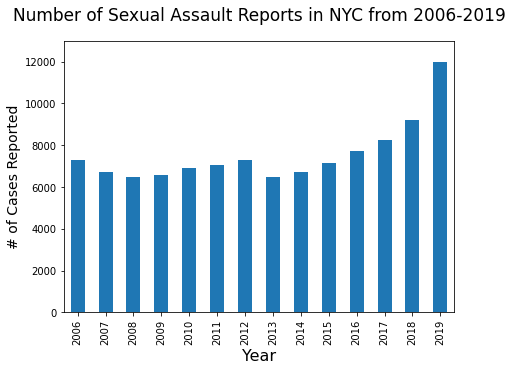

In [10]:
NYC_SA_complaints_df.groupby('report_year').size()
NYC_SAreports_year = NYC_SA_complaints_df.groupby('report_year').size()
NYC_SAreports_year.plot(kind='bar',figsize=(7, 5))
plt.ylim(0,13000)
plt.xlabel('Year', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Sexual Assault Reports in NYC from 2006-2019', size=17, pad=20)

The number of sexual assault complaints have increased overall since 2006. **Since 2013, there has been a steady increase in reported cases, peaking this past year in 2019 with 11,958 reported cases.** 

### When did these reported occurrences (sexual assault crimes) happen?
1. Make a occurrence_year column from start_date that contains only the occurrence start year
2. Use .groupby to group the number of cases that occurred in each year
3. Create a bar plot showing the number of cases that occurred each year 

In [11]:
NYC_SA_complaints_df['occurrence_year'] = NYC_SA_complaints_df['start_date'].dt.year

In [12]:
NYC_SA_complaints_df['occurrence_year'].value_counts()

2018.0    9454
2017.0    8171
2016.0    7686
2019.0    7526
2006.0    7495
2015.0    7217
2012.0    7198
2011.0    7195
2010.0    7041
2007.0    6794
2009.0    6759
2014.0    6711
2008.0    6645
2013.0    6535
2005.0     961
2004.0     460
2003.0     356
2002.0     300
2001.0     223
2000.0     189
1999.0     152
1998.0     121
1997.0      65
1996.0      64
1994.0      50
1993.0      46
1995.0      45
1992.0      25
1991.0      24
1985.0      20
1989.0      19
1977.0      16
1975.0      15
1986.0      15
1979.0      15
1990.0      14
1972.0      12
1987.0      11
1971.0      11
1983.0      10
1981.0      10
1974.0      10
1970.0       8
1973.0       8
1978.0       8
1980.0       7
1984.0       7
1988.0       7
1982.0       6
1965.0       6
1976.0       4
1968.0       3
1969.0       1
1967.0       1
1966.0       1
Name: occurrence_year, dtype: int64

Text(0.5, 1.0, 'Number of Sexual Assault Occurrences by Year based on NYC Reports from 2006-2019')

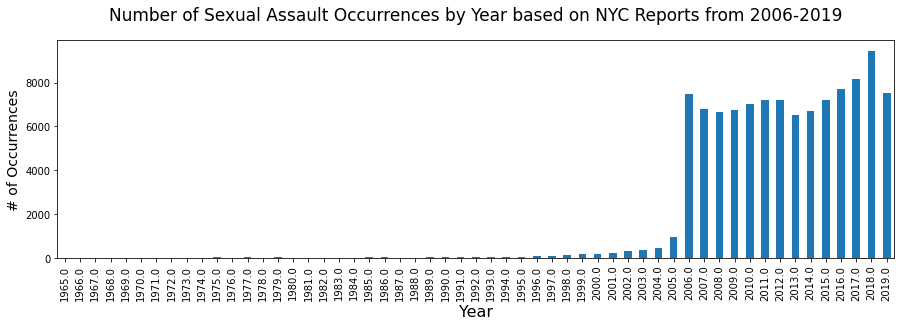

In [13]:
NYC_SA_complaints_df.groupby('occurrence_year').size()
NYC_SAoccurrence_year = NYC_SA_complaints_df.groupby('occurrence_year').size()
NYC_SAoccurrence_year.plot(kind='bar', figsize=(15, 4))
plt.xlabel('Year', size=16)
plt.ylabel('# of Occurrences', size=14)
plt.title('Number of Sexual Assault Occurrences by Year based on NYC Reports from 2006-2019', size=17, pad=20)

**Some of the occurrences from the 2006-2019 reports happened before 2006.** The date of the earliest occurrence goes back to the year 1965. However, most of the occurrences from the reports appear to have occurred from years 2006 and on. **While the number of reports peaked in 2019, the occurrences reached its highest number of 9,454 during year 2018.**

### When did the occurrences from the 2019 reports happen?
1. Filter for only rows that had their report year in 2019
2. Use value_counts to find when most of the occurrences happened

In [14]:
NYC_SAoccurrence_2019 = NYC_SA_complaints_df['report_year'] == 2019
NYC_SAoccurrence_2019_df= NYC_SA_complaints_df[NYC_SAoccurrence_2019]

In [15]:
NYC_SAoccurrence_2019_df['occurrence_year'].value_counts()

2019.0    7526
2018.0    1829
2017.0     517
2016.0     331
2015.0     252
2014.0     193
2013.0     169
2012.0     167
2009.0     132
2010.0     125
2011.0     122
2008.0      90
2007.0      58
2006.0      57
2005.0      42
2004.0      36
2002.0      33
1998.0      29
2003.0      22
2001.0      19
1999.0      19
1995.0      18
1996.0      17
1994.0      17
2000.0      11
1991.0      10
1985.0       9
1975.0       9
1989.0       9
1974.0       8
1977.0       8
1993.0       8
1997.0       6
1965.0       6
1972.0       6
1992.0       6
1970.0       6
1990.0       5
1983.0       5
1979.0       5
1980.0       5
1982.0       3
1971.0       3
1987.0       3
1981.0       3
1978.0       2
1984.0       2
Name: occurrence_year, dtype: int64

Out of the 11,958 reported cases in 2019, only 7,526 occurred in 2019, while the rest occurred before 2019. This means about **37% of sexual assault cases reported in 2019 did not occur in 2019.**

### Were the complaints reported to be completed or attempted crimes?
1. Use value_counts to find the number completed and attempted from the column 'crime_cmpltn'
2. Create a bar plot

In [16]:
NYC_SA_complaints_df['crime_cmpltn'].value_counts()

COMPLETED    101339
ATTEMPTED      4434
Name: crime_cmpltn, dtype: int64

Text(0.5, 1.0, 'Crime Completion of NYC Sexual Assault Reports from 2006-2019')

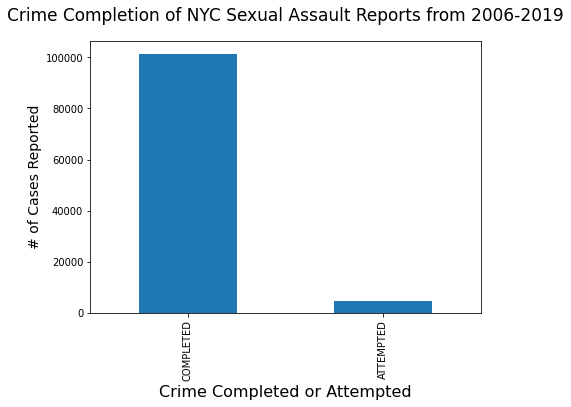

In [17]:
NYC_SA_complaints_df['crime_cmpltn'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Crime Completed or Attempted', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Crime Completion of NYC Sexual Assault Reports from 2006-2019', size=17, pad=20)

Of the sexual assault related complaints reported, **an overwhelming majority, 95.8%, were completed crimes.**

### Which New York City borough has the most/least reported sexual assault cases? 
1. Use value_counts to find the number of reported cases within each NYC borough 
2. Create a bar plot

In [18]:
NYC_SA_complaints_df['borough'].value_counts()

BROOKLYN         32926
MANHATTAN        25626
QUEENS           22956
BRONX            20440
STATEN ISLAND     3765
Name: borough, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) by NYC Boroughs')

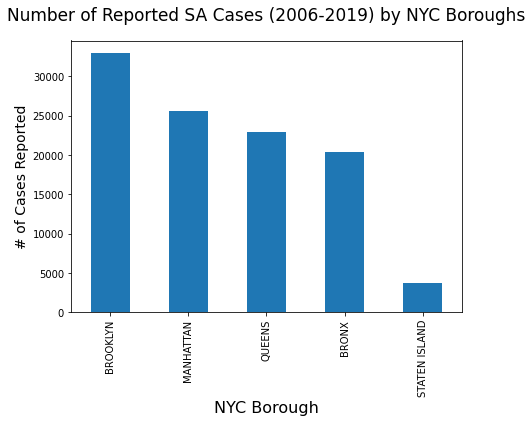

In [19]:
NYC_SA_complaints_df['borough'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('NYC Borough', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) by NYC Boroughs', size=17, pad=20)

**Brooklyn has the most reported sexual assault cases with 32,926 cases. 
Staten Island has the least number of cases by far with only 3,765 cases.**

### Where are the occurrences of these reported sexual assault cases happening?
1. Use value_counts to find the number of cases in each premise/location
2. Create a bar plot

In [20]:
NYC_SA_complaints_df['premises_desc'].value_counts()

RESIDENCE - APT. HOUSE        40625
RESIDENCE-HOUSE               14710
STREET                        13189
RESIDENCE - PUBLIC HOUSING     9756
TRANSIT - NYC SUBWAY           6915
                              ...  
VIDEO STORE                       8
DAYCARE FACILITY                  2
LOAN COMPANY                      2
ATM                               2
TRAMWAY                           1
Name: premises_desc, Length: 72, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Premises Description')

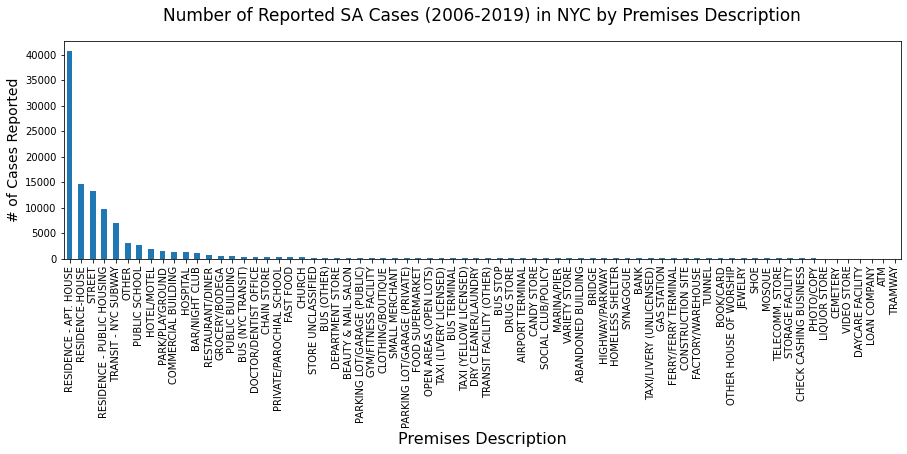

In [21]:
NYC_SA_complaints_df['premises_desc'].value_counts().plot(kind='bar', figsize=(15, 4))
plt.xlabel('Premises Description', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Premises Description', size=17, pad=20)

In [22]:
NYC_SA_complaints_df['location'].value_counts()

INSIDE         76079
FRONT OF        9204
REAR OF          941
OPPOSITE OF      858
Name: location, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Location')

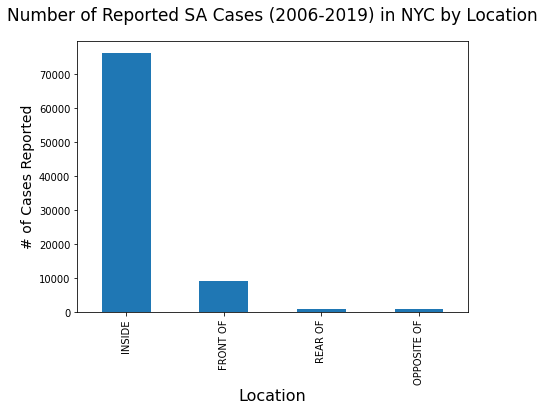

In [23]:
NYC_SA_complaints_df['location'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Location', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Location', size=17, pad=20)

**A majority of cases are reported to have occurred inside and in a premises of a Residence/Apt House.**

### How many reported cases occurred inside a Residence Apartment House?
1. Create a filter for residence- apt/house and location- inside
2. Make a new subset with that filter
3. Use .shape to figure out how many rows and therefore reported cases there are

In [24]:
residence_filter = NYC_SA_complaints_df['premises_desc'] == 'RESIDENCE - APT. HOUSE'
location_filter = NYC_SA_complaints_df['location'] == 'INSIDE'
SA_inside_residence_df = NYC_SA_complaints_df[residence_filter & location_filter]
SA_inside_residence_df

,borough,start_date,start_time,end_date,end_time,precinct,report_date,classif_code,offense_desc,pd_desc,...,location,premises_desc,suspect_age,suspect_race,suspect_sex,vic_age,vic_race,vic_sex,report_year,occurrence_year
0,BROOKLYN,2007-10-16,02:00:00,12/31/2007,03:00:00,83.0,2016-03-11,116,SEX CRIMES,SEXUAL ABUSE,...,INSIDE,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,<18,WHITE HISPANIC,F,2016,2007.0
5,BROOKLYN,2017-02-28,00:01:00,02/28/2017,11:25:00,83.0,2017-02-28,233,SEX CRIMES,"SEXUAL ABUSE 3,2",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,<18,UNKNOWN,F,2017,2017.0
6,BRONX,2014-01-01,01:00:00,11/14/2014,13:00:00,46.0,2014-11-29,104,RAPE,RAPE 3,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,WHITE HISPANIC,M,<18,WHITE HISPANIC,F,2014,2014.0
11,BROOKLYN,2014-05-31,23:00:00,NaN,NaN,77.0,2014-06-01,233,SEX CRIMES,"CHILD, ENDANGERING WELFARE",...,INSIDE,RESIDENCE - APT. HOUSE,18-24,BLACK,F,<18,BLACK,M,2014,2014.0
15,BROOKLYN,2015-08-15,09:00:00,08/16/2015,12:00:00,75.0,2015-08-18,233,SEX CRIMES,"SEXUAL ABUSE 3,2",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,25-44,BLACK HISPANIC,F,2015,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105756,BROOKLYN,2012-11-28,00:01:00,NaN,NaN,73.0,2012-11-29,233,SEX CRIMES,"CHILD, ENDANGERING WELFARE",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,<18,BLACK,M,2012,2012.0
105759,BROOKLYN,2012-01-23,00:01:00,01/23/2012,12:30:00,75.0,2012-01-23,233,SEX CRIMES,"SEXUAL ABUSE 3,2",...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,<18,UNKNOWN,F,2012,2012.0
105761,STATEN ISLAND,2013-07-13,14:00:00,NaN,NaN,120.0,2013-07-16,104,RAPE,RAPE 1,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,BLACK,F,2013,2013.0
105762,MANHATTAN,2014-05-01,00:01:00,10/03/2014,23:59:00,20.0,2014-10-21,104,RAPE,RAPE 1,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,WHITE,M,25-44,WHITE,F,2014,2014.0


In [25]:
SA_inside_residence_df.shape

(38067, 22)

**38,067 of the reported cases occurred inside a Residence Apartment House.**

### What are the offense levels of the reported sexual assault cases?
1. Use value_counts to find the number of reported cases with each unique offense level
2. Create a bar plot

In [26]:
NYC_SA_complaints_df['offense_lvl'].value_counts()

MISDEMEANOR    67160
FELONY         38613
Name: offense_lvl, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Offense Level')

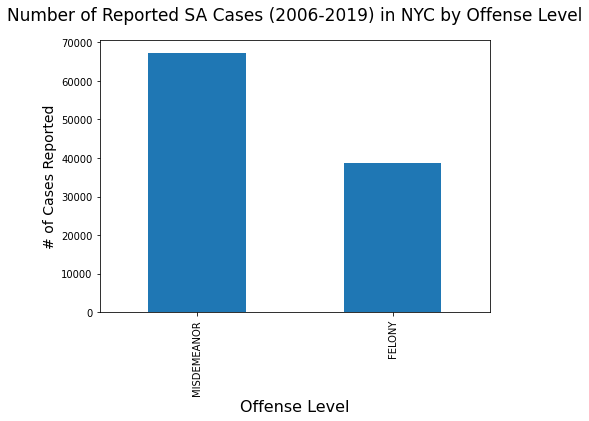

In [27]:
NYC_SA_complaints_df['offense_lvl'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Offense Level', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Offense Level', size=17, pad=20)

**The two types of offense levels in this dataset are Misdemeanor and Felony, with more of the cases being misdemeanors.**

### What are the different types of sexual assault related offenses among the reports?
1. Use value_counts to find the count of each unique value in the column 'offense_desc'
2. Create a bar plot

In [28]:
NYC_SA_complaints_df['offense_desc'].value_counts()

SEX CRIMES    84749
RAPE          21024
Name: offense_desc, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Type of Offense')

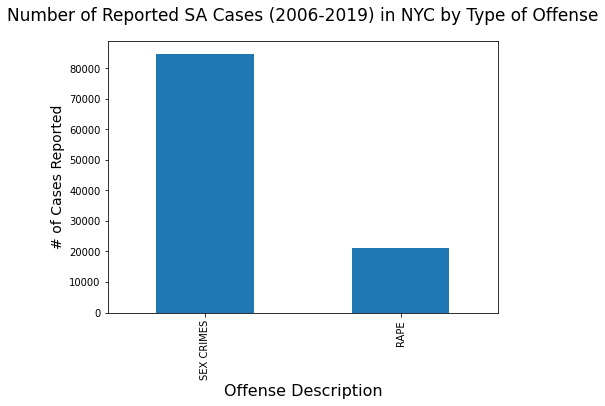

In [29]:
NYC_SA_complaints_df['offense_desc'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Offense Description', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Type of Offense', size=17, pad=20)

Out of the all sexual assault related reports in NYC from 2006-2019, **84,749 were sex crimes and 21,024 were rape cases.** There were a lot more sex crime reports, than rape reports

### What are the specific offense classifications of the sexual assault reports?
1. Use value_counts to find the number of reported cases in each unique offense classification
2. Create a bar plot

In [30]:
NYC_SA_complaints_df['pd_desc'].value_counts()

SEXUAL ABUSE 3,2                  40925
CHILD, ENDANGERING WELFARE        21238
RAPE 1                            13662
SODOMY 1                           5547
SEXUAL MISCONDUCT,INTERCOURSE      4513
SEXUAL ABUSE                       4476
AGGRAVATED SEXUAL ASBUSE           4383
RAPE 3                             3000
RAPE 1,ATTEMPT                     2254
RAPE 2                             2108
OBSCENE MATERIAL - UNDER 17 YE     1531
SODOMY 3                            547
COURSE OF SEXUAL CONDUCT AGAIN      406
SEXUAL MISCONDUCT,DEVIATE           346
SODOMY 2                            324
OBSCENITY 1                         198
SEX CRIMES                          161
OBSCENITY, PERFORMANCE 3            106
OBSCENITY, MATERIAL 3                28
INCEST                               10
FAC. SEXUAL OFFENSE W/CONTROLL        5
SODOMY,CONSENSUAL                     3
INCEST 3                              1
ABORTIONAL ARTICLES,ISSUING           1
Name: pd_desc, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Type of Offense Classification')

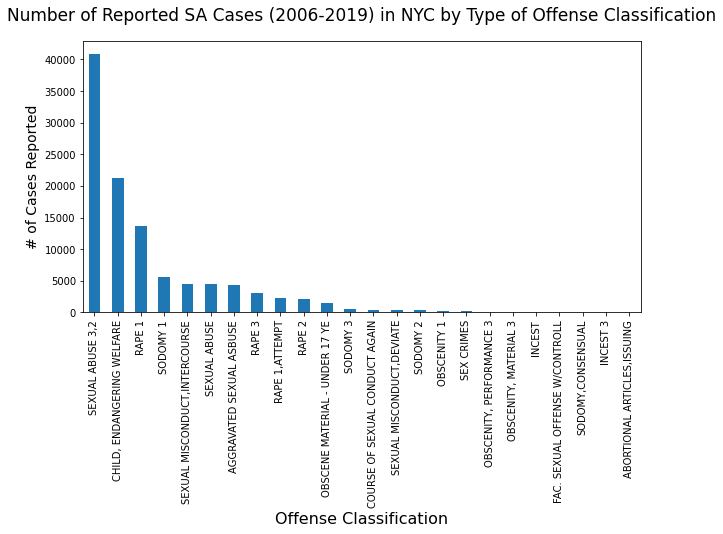

In [31]:
NYC_SA_complaints_df['pd_desc'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Offense Classification', size=16)
plt.ylabel('# of Cases Reported', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Type of Offense Classification', size=17, pad=20)

**The most common offense classification among reported sexual assault cases is Sexual Abuse 3,2, followed by Child, Endangering Welfare, and Rape 1.**

## What are the most common victim demographics among the reports?

### Victim Demographics by Age

In [32]:
NYC_SA_complaints_df['vic_age'].value_counts()

<18        51750
25-44      23700
18-24      17357
45-64       4949
UNKNOWN     2632
65+          560
-2             1
908            1
-1             1
Name: vic_age, dtype: int64

**There seem to be values within the victim age column that contain errors.**
1. Find the index of the rows containing victim age 908, -1, and -2.
2. Drop the rows and create a new subset

In [33]:
print(NYC_SA_complaints_df[NYC_SA_complaints_df['vic_age'] == '908'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['vic_age'] == '-1'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['vic_age'] == '-2'].index.values)

[21715]
[43892]
[79449]


In [34]:
NYC_SA_drop= NYC_SA_complaints_df.drop([21715, 43892, 79449])

1. Use value_counts to find the unique values in the columns
2. Create an age_order so the x-axis is organized in ascending age order
2. Create a bar plot

In [35]:
NYC_SA_drop['vic_age'].value_counts()

<18        51750
25-44      23700
18-24      17357
45-64       4949
UNKNOWN     2632
65+          560
Name: vic_age, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Victim Age Group')

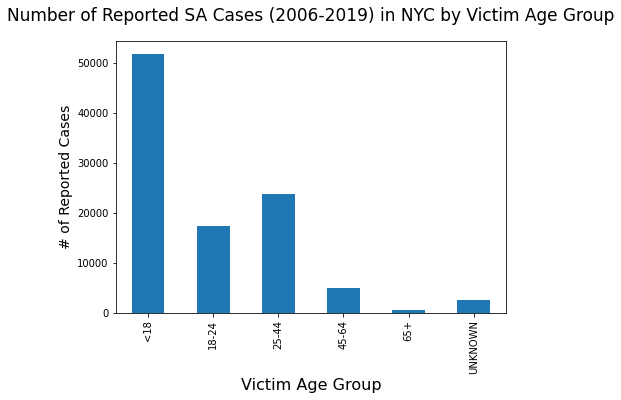

In [36]:
age_order = ['<18','18-24', '25-44', '45-64', '65+', 'UNKNOWN']
NYC_SA_drop['vic_age'].value_counts().loc[age_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Victim Age Group', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Victim Age Group', size=17, pad=20)

The **most common age group among the victims** are overwhelming those **under 18 years old.**

### Victim Demographics by Race
1. Use value_counts to find the count of each unique value in the column
2. Create a bar plot

In [37]:
NYC_SA_complaints_df['vic_race'].value_counts()

BLACK                             34746
WHITE HISPANIC                    30278
WHITE                             17536
UNKNOWN                           10812
ASIAN / PACIFIC ISLANDER           6188
BLACK HISPANIC                     5910
AMERICAN INDIAN/ALASKAN NATIVE      299
OTHER                                 3
Name: vic_race, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Victim Race')

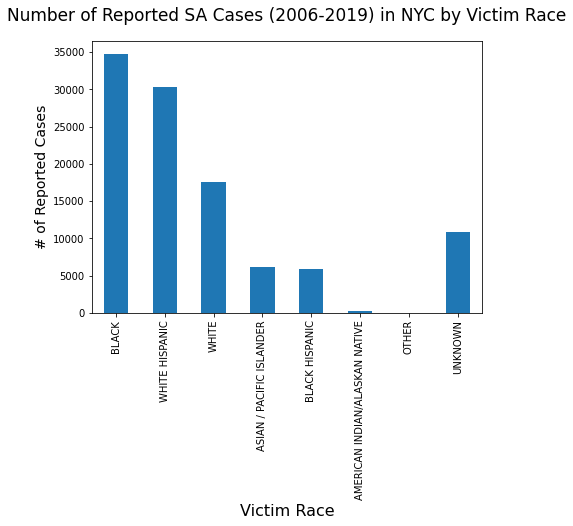

In [38]:
race_order = ['BLACK', 'WHITE HISPANIC', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER', 'UNKNOWN']
NYC_SA_complaints_df['vic_race'].value_counts().loc[race_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Victim Race', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Victim Race', size=17, pad=20)


**The most common race groups among victims are Black and White Hispanic.**

### Victim Demographics by Sex
1. Use value_counts to find the count of each unique value in the column
2. Create a bar plot

In [39]:
NYC_SA_complaints_df['vic_sex'].value_counts()

F    87985
M    15635
E     2034
D      118
Name: vic_sex, dtype: int64

The source doesn't state what E or D stands for.

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Victim Sex')

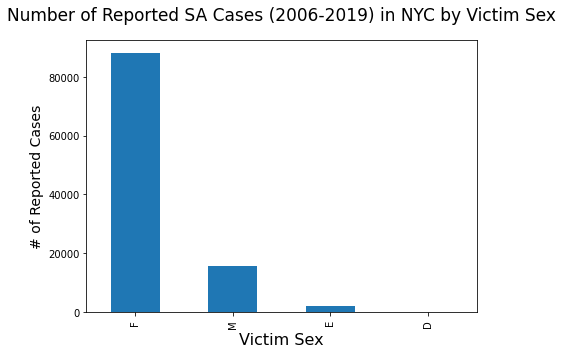

In [40]:
NYC_SA_complaints_df['vic_sex'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Victim Sex', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Victim Sex', size=17, pad=20)

**The most common sex among sexual assault victims are overwhelmingly those who identify as female.**

## What are the most common suspect demographics among the cases?

### Suspect Demographics by Age
1. Find the index of the rows containing errors for suspect ages 
2. Drop the rows and create a new subset
3. Use value_counts to find the unique values in the columns
4. Create a bar plot

In [41]:
NYC_SA_complaints_df['suspect_age'].value_counts()

25-44      19484
UNKNOWN     7969
18-24       7749
45-64       7221
<18         3970
65+          952
324            1
-978           1
1017           1
-941           1
2018           1
Name: suspect_age, dtype: int64

In [42]:
print(NYC_SA_complaints_df[NYC_SA_complaints_df['suspect_age'] == '2018'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['suspect_age'] == '-978'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['suspect_age'] == '324'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['suspect_age'] == '1017'].index.values)
print(NYC_SA_complaints_df[NYC_SA_complaints_df['suspect_age'] == '-941'].index.values)

[54242]
[54384]
[36028]
[98290]
[55719]


In [43]:
NYC_SA_drop2= NYC_SA_complaints_df.drop([54242, 54384, 36028, 98290, 55719])

In [44]:
NYC_SA_drop2['suspect_age'].value_counts()

25-44      19484
UNKNOWN     7969
18-24       7749
45-64       7221
<18         3970
65+          952
Name: suspect_age, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Suspect Age Groups')

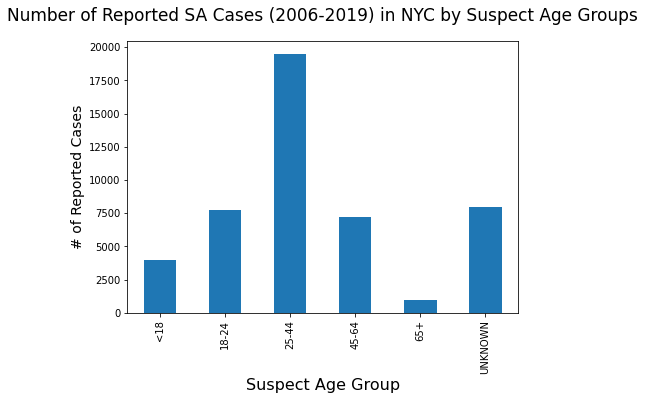

In [45]:
NYC_SA_drop2['suspect_age'].value_counts().loc[age_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Suspect Age Group', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Suspect Age Groups', size=17, pad=20)

Compared to the data on victims' ages, there isn't a lot of data on suspects' ages. From the data we do have, it is visible that **a majority of reported suspects are ages 25-44.**

### Suspect Demographics by Race
1. Use value_counts to find the count of each unique value in the column
2. Create a bar plot

In [46]:
NYC_SA_complaints_df['suspect_race'].value_counts()

BLACK                             25407
WHITE HISPANIC                    17414
UNKNOWN                           12694
WHITE                              7543
BLACK HISPANIC                     4847
ASIAN / PACIFIC ISLANDER           3485
AMERICAN INDIAN/ALASKAN NATIVE      346
OTHER                                 2
Name: suspect_race, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Suspect Race')

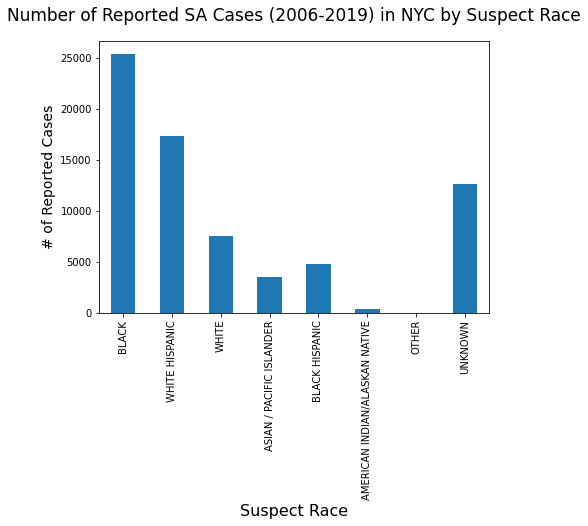

In [47]:
NYC_SA_complaints_df['suspect_race'].value_counts().loc[race_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Suspect Race', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Suspect Race', size=17, pad=20)

**The most common race groups among suspects are Black and White Hispanic.**

### Suspect Demographics by Sex
1. Use value_counts to find the count of each unique value in the column
2. Create a bar plot

In [48]:
NYC_SA_complaints_df['suspect_sex'].value_counts()

M    61474
F     5725
U     3846
Name: suspect_sex, dtype: int64

Text(0.5, 1.0, 'Number of Reported SA Cases (2006-2019) in NYC by Suspect Sex')

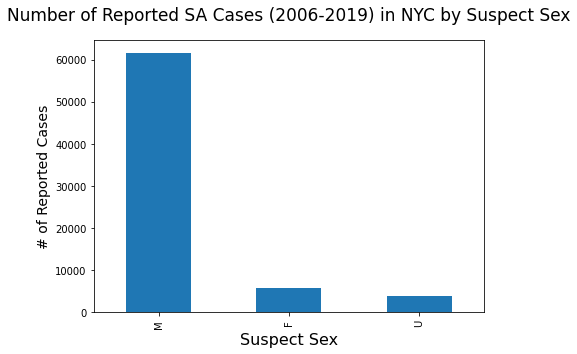

In [49]:
NYC_SA_complaints_df['suspect_sex'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Suspect Sex', size=16)
plt.ylabel('# of Reported Cases', size=14)
plt.title('Number of Reported SA Cases (2006-2019) in NYC by Suspect Sex', size=17, pad=20)

**The most common sex among sexual assault suspects are overwhelmingly those who identify as male.**

## How do the suspects and victims compare based on demographics?

1. Create two data frames from the counts of victim_age and suspect_age
2. Rename the columns and index
3. Merge the two data frames
4. Plot a bar chart
5. Repeat for Age, Race, and Sex

### Suspects and Victims by Age

In [50]:
vic_age=NYC_SA_drop.groupby('vic_age').size().to_frame()
vic_age.columns = ['victims']
vic_age.index.set_names('age', inplace=True)

sus_age=NYC_SA_drop2.groupby('suspect_age').size().to_frame()
sus_age.columns = ['suspects']
sus_age.index.set_names('age', inplace=True)

age_cnt_df = vic_age.merge(sus_age, left_index=True, right_index=True)
age_cnt_df

,victims,suspects
age,,
18-24,17357,7749
25-44,23700,19484
45-64,4949,7221
65+,560,952
<18,51750,3970
UNKNOWN,2632,7969


Text(0.5, 1.0, 'Suspects and Victims from NYC SA Reports (2006-2019) by Age')

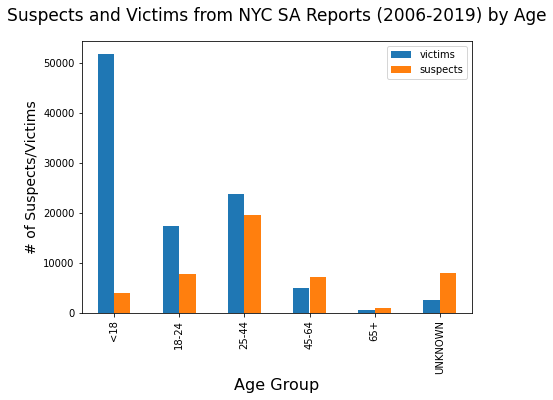

In [51]:
age_cnt_df.loc[age_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Age Group', size=16)
plt.ylabel('# of Suspects/Victims', size=14)
plt.title('Suspects and Victims from NYC SA Reports (2006-2019) by Age', size=17, pad=20)

There seem to be big differences between the distribution of age groups among suspects and victims. **The difference between victims under 18 and suspects under 18 is especially big**, with over fifty thousand victims under 18 and a little under four thousand suspects under 18. Once again, it's visible that there are many reports that don't have data on the suspects' age groups. 

### Suspects and Victims by Race

In [52]:
vic_race=NYC_SA_complaints_df.groupby('vic_race').size().to_frame()
vic_race.columns = ['victims']
vic_race.index.set_names('race', inplace=True)

sus_race=NYC_SA_complaints_df.groupby('suspect_race').size().to_frame()
sus_race.columns = ['suspects']
sus_race.index.set_names('race', inplace=True)

race_cnt_df = vic_race.merge(sus_race, left_index=True, right_index=True)
race_cnt_df

,victims,suspects
race,,
AMERICAN INDIAN/ALASKAN NATIVE,299,346
ASIAN / PACIFIC ISLANDER,6188,3485
BLACK,34746,25407
BLACK HISPANIC,5910,4847
OTHER,3,2
UNKNOWN,10812,12694
WHITE,17536,7543
WHITE HISPANIC,30278,17414


Text(0.5, 1.0, 'Suspects and Victims from NYC SA Reports (2006-2019) by Race')

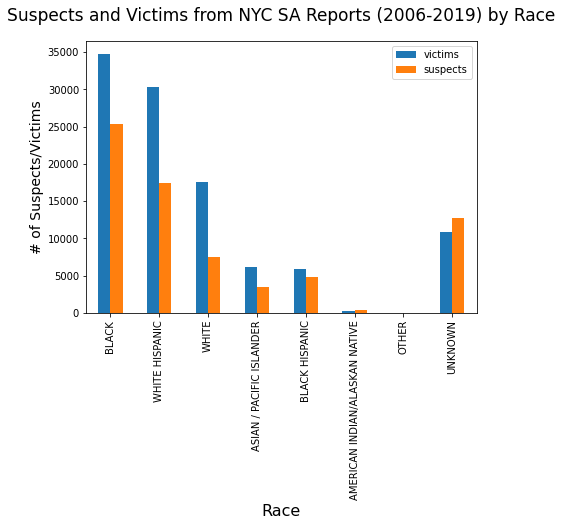

In [53]:
race_cnt_df.loc[race_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Race', size=16)
plt.ylabel('# of Suspects/Victims', size=14)
plt.title('Suspects and Victims from NYC SA Reports (2006-2019) by Race', size=17, pad=20)

**The demographics of the suspects' and victims' race are similar in how they compare among the difference races**, but the suspects' data still falls short in comparison to the victims'. 

### Suspects and Victims by Sex

In [54]:
vic_sex=NYC_SA_complaints_df.groupby('vic_sex').size().to_frame()
vic_sex.columns = ['victims']
vic_sex.index.set_names('sex', inplace=True)

sus_sex=NYC_SA_complaints_df.groupby('suspect_sex').size().to_frame()
sus_sex.columns = ['suspects']
sus_sex.index.set_names('sex', inplace=True)

sex_cnt_df = sus_sex.merge(vic_sex, left_index=True, right_index=True)

sex_cnt_df= sex_cnt_df.T
sex_cnt_df

sex,F,M
suspects,5725,61474
victims,87985,15635


Text(0, 0.5, '# of Suspects/Victims')

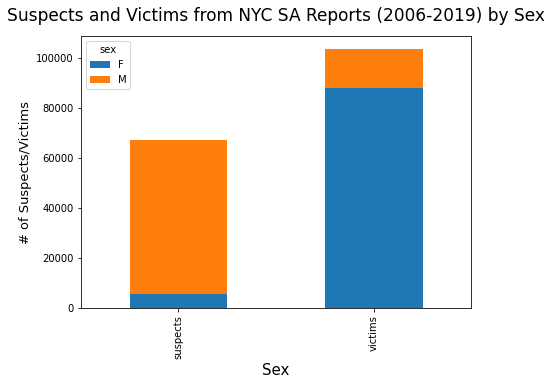

In [55]:
sex_cnt_df.plot(kind='bar', stacked="True", figsize=(7, 5))
plt.title('Suspects and Victims from NYC SA Reports (2006-2019) by Sex', size=17, pad=15)
plt.xlabel('Sex', size=15)
plt.ylabel('# of Suspects/Victims', size=13)

In [ ]:
sex_cnt_df2 = sex_cnt_df.T
sex_cnt_df2 

**The suspects are overwhelmingly individuals who identify as male, while the victims are overwhelmingly individuals who identify as female.**

## How many reported sex crimes in NYC include a female victim under 18 ?
1. Create filters for rows where victim sex is female and victim age group is under 18.
2. Subset the NYC sexual assault data frame.
3. Count the number of rows.

In [58]:
victim_female__filter = NYC_SA_complaints_df['vic_sex'] == 'F'
victim_age_filter = NYC_SA_complaints_df['vic_age'] == '<18'
victim_18_female_df = NYC_SA_complaints_df[(victim_female__filter) & (victim_age_filter )]
cases_with_under18_female_victim = victim_18_female_df.shape[0]
cases_with_under18_female_victim

40399

**40,399 out of the 105,773 sexual assault reports have a female victim under age 18.** 

## How many reported sex crimes in NYC include a male suspect and a female victim ?
1. Create filters for rows where victim sex is female and suspect sex is male.
2. Subset the NYC sexual assault data frame.
3. Count the number of rows.

In [59]:
victim_female__filter = NYC_SA_complaints_df['vic_sex'] == 'F'
suspect_male_filter = NYC_SA_complaints_df['suspect_sex'] == 'M'
suspect_victim_df = NYC_SA_complaints_df[(victim_female__filter) & (suspect_male_filter)]
cases_with_male_suspect_female_victim = suspect_victim_df.shape[0]
cases_with_male_suspect_female_victim

54756

**54,756 out of the 105,773 sexual assault reports have a male suspect and a female victim.** This is about 51.2% of all cases. However, it's important to recognize that **this dataset is missing a considerable amount of data on suspects' sex.**

To draw a comparison, I'd like to see how many complaints have a female suspect and a male victim.

## How many reported sex crimes in NYC include a female suspect and a male victim ?

In [57]:
victim_male__filter = NYC_SA_complaints_df['vic_sex'] == 'M'
suspect_female_filter = NYC_SA_complaints_df['suspect_sex'] == 'F'
suspect_victim_df2 = NYC_SA_complaints_df[(victim_male__filter) & (suspect_female_filter)]
cases_with_female_suspect_male_victim = suspect_victim_df2.shape[0]
cases_with_female_suspect_male_victim

2430

**2,430 complaints out of the 105,773 sexual assault complaints have a female suspect and a male victim. That is about 2.3% of all cases.** Even considering the missing data, this is a very small percentage and and is very low in comparison to the percentage of reports with a male suspect and a female victim.